In [307]:
import numpy as np
import tensorflow as tf

from pureEM import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [328]:
ToyNBackTask3().genseq()

(array([[0, 1, 2, 3, 4]]), array([[1, 2, 0, 0, 0]]), array([[0, 0, 0, 0, 1]]))

In [210]:
net = PureEM()
task = ToyNBackTask3()

In [347]:
net = PureEM()
task = ToyNBackTask3()
net.reinitialize()
for ep in range(1): 
  T,X,Y = task.genseq()
  feed_dict = {net.trial_ph:T,net.stim_ph:X,net.y_ph:Y}
  ops = [
    net.M_keys,
    net.query_key_sim,
    net.stim
  ]
  outs = net.sess.run(ops,feed_dict)

[0, 1]
[0, 1, 0]
[0, 1, 0, 0]


In [352]:
print(X)
print(outs[0])
print(outs[1])


[[0 2 2 1 0]]
[[-0.77761596 -0.7445188 ]
 [-0.1475468   0.39559972]
 [-0.1475468   0.39559972]
 [-1.2010263   0.35296026]
 [-0.77761596 -0.7445188 ]]
[0.00235415 0.99293756 0.00235415 0.00235415]


In [ ]:
net = PureEM()
task = ToyNBackTask3()

itr = 20000
L = -1*np.ones(itr)
A = -1*np.ones(itr)
for ep in range(itr): 
  T,X,Y = task.genseq()
  feed_dict = {net.trial_ph:T,net.stim_ph:X,net.y_ph:Y}
  ops = [
    net.minimizer,
    net.train_loss,
    net.response
        ]
  outs = net.sess.run(ops,feed_dict)
  _,loss,yhat = outs

  L[ep] = loss.mean()
  A[ep] = np.mean(yhat==Y[:,2:])
  
ax = plt.gca()
ax.plot(L)
ax.twinx().scatter(range(len(A)),A,c='r')

[0.9, 1.0]
[0.9, 1.0, 0.9]
[0.9, 1.0, 0.9, 0.81]


In [177]:
net = PureEM()
task = ToyNBackTask2()

11 Tensor("transpose:0", shape=(1, 7), dtype=float32)
12 Tensor("MatMul_1:0", shape=(1, 7), dtype=float32)
11 Tensor("transpose_1:0", shape=(1, 7), dtype=float32)
12 Tensor("MatMul_3:0", shape=(1, 7), dtype=float32)


In [44]:
sess = net.sess
self = net
T,X,Y = task.genseq()

In [167]:
from scipy.spatial.distance import cosine
temp = 10
softmax = lambda x: np.exp(temp*x)/sum(np.exp(temp*x))

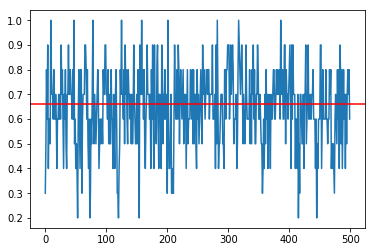

In [5]:
ntrials = 3
nstim = 2
dim = 5

task = NBackTask(2)
a = PureEM(ntrials,nstim,dim)
Acc = []

for m in range(1):
  L = []
  A = []
  a.reinitialize()
  for ep in range(500):
    # zero out memory
    a.sess.run([a.empty_memory])
    trial_acc = 0
    X,Y = task.gen_seq(ntrials,nstim)
    for tidx,(x,y) in enumerate(zip(X.squeeze(),Y.squeeze())):
      feed_dict = {a.stim_ph:[x],a.y_ph:[y],a.trial_ph:[tidx]}
      _,trial_loss,resp = a.sess.run([a.minimizer,a.train_loss,a.response],feed_dict)
      trial_acc += resp.squeeze()==y
      a.sess.run(a.write_to_memory,feed_dict)
    episode_loss = np.mean(trial_loss)
    L.append(episode_loss)
    A.append(trial_acc/ntrials)
  Acc.append(A)

Acc = np.array(Acc)
M = Acc.mean(0)
plt.plot(M)
plt.axhline(.66,c='r')

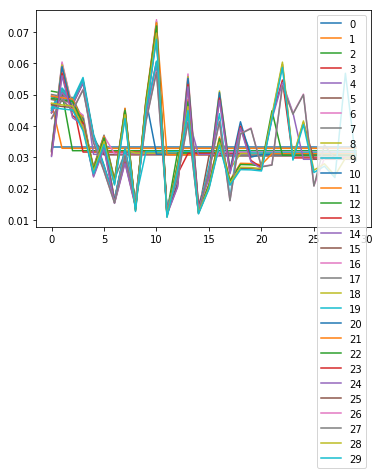

In [272]:
X,Y = task.gen_seq(ntrials,nstim)
a.sess.run([a.empty_memory])
for tidx,(x,y) in enumerate(zip(X.squeeze(),Y.squeeze())):
  feed_dict = {a.stim_ph:[x],a.y_ph:[y],a.trial_ph:[tidx]}
  sim = a.sess.run([a.state_Mkeys_sim],feed_dict)
  a.sess.run(a.write_to_memory,feed_dict)
#   print(tidx,sim[0][0])
  plt.plot(sim[0][0],label=tidx)
plt.legend()

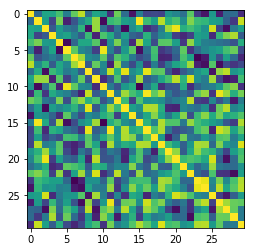

In [271]:
plt.imshow(np.corrcoef(a.sess.run(a.trial_emat)))

-- 0
[[0. 0. 0. 0. 0.]]
-- 1
[[0.03802217 0.01818871 0.0085121  0.02468535 0.0072134 ]]
-- 2
[[0.1073253  0.05134134 0.02402714 0.06967941 0.0203613 ]]
-- 3
[[0.17879725 0.06483409 0.06458084 0.10182273 0.03885363]]
-- 4
[[0.24136746 0.09866016 0.0739688  0.1451284  0.04979603]]
-- 5
[[0.33176005 0.11418054 0.12709017 0.18471709 0.07355186]]
-- 6
[[0.41789007 0.16009511 0.14078194 0.24388224 0.08876892]]
-- 7
[[0.51382434 0.18702891 0.17381963 0.30101654 0.12475471]]
-- 8
[[0.6097586  0.2139627  0.20685732 0.35815084 0.1607405 ]]
-- 9
[[0.7056797  0.24245295 0.23822159 0.4162205  0.19612876]]


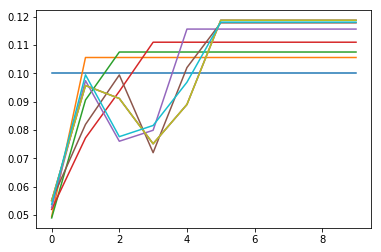

In [284]:
a.sess.run([a.empty_memory])
X,Y = task.gen_seq(ntrials,nstim)
for tidx,(x,y) in enumerate(zip(X.squeeze(),Y.squeeze())):
  feed_dict = {a.stim_ph:[x],a.y_ph:[y],a.trial_ph:[tidx]}
  K,V,m = a.sess.run([a.M_keys,a.M_values,a.retrieved_memory],feed_dict)
  print('--',tidx)
  print(m)
#   print(K)
#   print(V)
  sim = a.sess.run([a.state_Mkeys_sim],feed_dict)
  a.sess.run(a.write_to_memory,feed_dict)
#   print(tidx,sim[0][0])
  plt.plot(sim[0][0])